In [3]:
import pandas as pd

import numpy as np

In [5]:
df = pd.read_csv('palindrome_test1', header=None, index_col=None)

serieslen = [len(i[i.find('s')+1: i.find('e')]) for i in df[0]]

df[2] = serieslen

dfg = df.groupby(2).groups

In [11]:
chunk = 20000 // 14 + 1

l = list()
for k in dfg.keys():
    klen = len(dfg[k])
    if klen < chunk:
        candidate = list(dfg[k]) * (chunk // klen + 1)
        candidate = candidate[:chunk]
        for i in candidate:
            l.append(tuple(df.iloc[i, [0,1]].values.tolist()))
    else:
        candidate = np.random.permutation(range(klen))[:chunk]
        for i in candidate:
            l.append(tuple(df.iloc[dfg[k][i], [0,1]].values.tolist()))
        

traindf = pd.DataFrame(l).sample(20000)

In [12]:
traindf.to_csv('palindrome_train', header=None, index=None)


both = df[[0, 1]].values.tolist()

both = [(a, b) for a, b in both]

count = 0
testl = list()
for i in both:
    if i not in l:
        testl.append(i)
    count += 1


testdf = pd.DataFrame(testl).sample(1000)
testdf.to_csv('palindrome__test1', header=None, index=None)

In [2]:


df = df.reindex(np.random.permutation(df.index))

train = df[:20000]

test1 = df[20000: 21000]

train.to_csv('dyck2_train', header=None, index=None)

test1.to_csv('dyck2_test1', header=None, index=None)

In [13]:
for i in range(2, 6):
    df = pd.read_csv('./palindrome_test'+str(i), header=None, index_col=None)

    df = df.reindex(np.random.permutation(df.index))
    df = df[:1000]
    df.to_csv('palindrome__test'+str(i), header=None, index=None)


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

# check length

dyck1 = pd.read_csv('dyck1_train', header=None, index_col=None)

dyck1l = dyck1.values.tolist()

dyck1ll = list(map(lambda x: len(x[0][x[0].find('s')+1: x[0].find('e')]), dyck1l))

from collections import defaultdict
dyck1d = defaultdict(lambda: 0)
for i in dyck1ll:
    dyck1d[i] += 1

plt.bar(dyck1d.keys(), dyck1d.values())

<BarContainer object of 14 artists>

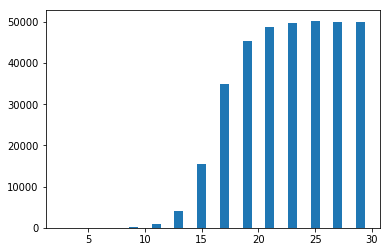

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

# check length

dyck2 = pd.read_csv('palindrome_test1', header=None, index_col=None)

dyck2l = dyck2.values.tolist()

dyck2ll = list(map(lambda x: len(x[0][x[0].find('s')+1: x[0].find('e')]), dyck2l))

from collections import defaultdict
dyck2d = defaultdict(lambda: 0)
for i in dyck2ll:
    dyck2d[i] += 1

plt.bar(dyck2d.keys(), dyck2d.values())

In [57]:
dfg[2]

Int64Index([4455, 13515], dtype='int64')

In [61]:
df.iloc[13515, :]

0                     s[]eeeeeeeeeeeeeeeeeeeeeeeeeeeee
1    0xb0x1a0xb0x10x10x10x10x10x10x10x10x10x10x10x1...
2                                                    2
3                                                    1
Name: 13515, dtype: object